In [0]:
#regresiones lineales 
"""
The first line of the preceding code enables matplotlib to display the graphical output of the code in the notebook environment. 
The lines of code that follow use the import keyword to load various Python modules into our programming environment.
The last statement is used to set the aesthetic look of the graphs that matplotlib generates to the type displayed by the seaborn module.
"""
%matplotlib inline 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg 
import pandas as pd 
import numpy as np 
import patsy 
from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split 
plt.style.use('seaborn') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

In [0]:
  rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [0]:
#limpiamos los valores nulos
rawBostonData = rawBostonData.dropna()

In [0]:
#limpiamos duplicados
rawBostonData = rawBostonData.dropna()

In [0]:
list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [0]:
renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita', 
 ' ZN ':'landOver25K_sqft', 
 'INDUS ':'non-retailLandProptn', 
 'CHAS':'riverDummy', 
 'NOX':'nitrixOxide_pp10m', 
 'RM':'AvgNo.RoomsPerDwelling', 
 'AGE':'ProptnOwnerOccupied', 
 'DIS':'weightedDist', 
 'RAD':'radialHighwaysAccess', 
 'TAX':'propTaxRate_per10K', 
 'PTRATIO':'pupilTeacherRatio', 
 'LSTAT':'pctLowerStatus', 
 'MEDV':'medianValue_Ks'}) 
renamedBostonData.head() 

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [0]:
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [0]:
#calculamos estadisticas basicas
"""
We used the pandas function, describe, called on the DataFrame to calculate simple statistics for numeric fields (this includes any field with a numpy number
in the DataFrame. The statistics include the minimum, the maximum, the count of rows in each column, the average of each column (mean), the 25th percentile, 
the 50th percentile, and the 75th percentile.  We transpose (using the .T function) the output of the describe function to get a better layout.
"""
renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [0]:
#Divide the DataFrame into training and test sets,
"""
We choose a test data size of 30%, which is 0.3. The train_test_split function is used to achieve this. We set the seed of the random number generator 
so that we can obtain a reproducible split each time we run this code. An arbitrary value of 10 is used here. 
It is good model-building practice to divide a dataset being used to develop a model into at least two parts. 
One part is used to develop the model and it is called a training set (X_train and y_train combined).
"""
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

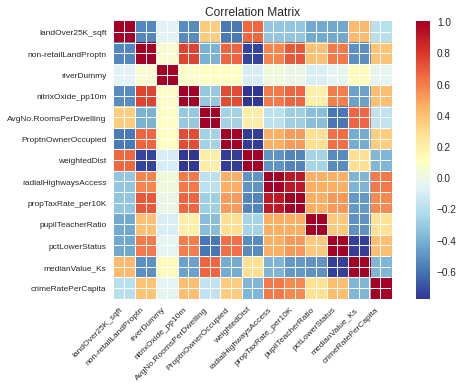

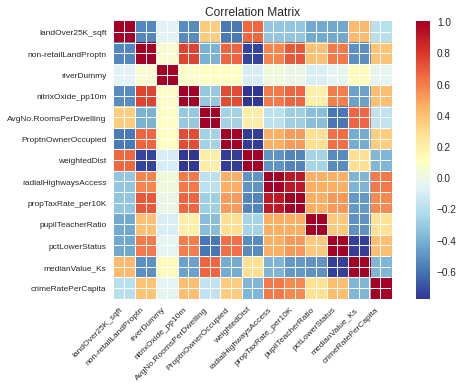

In [0]:
#Calculate and plot a correlation matrix for the train_data set
#el backslash es para continuar la linea en el renglon siguiente
corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

In [0]:
"""
In the preceding heatmap, we can see that there is a strong positive correlation (an increase in one causes an increase in the other) 
between variables that have orange or red squares. 
There is a strong negative correlation (an increase in one causes a decrease in the other) between variables with blue squares. 
There is little or no correlation between variables with pale-colored squares.
"""


'\nIn the preceding heatmap, we can see that there is a strong positive correlation (an increase in one causes an increase in the other) \nbetween variables that have orange or red squares. \nThere is a strong negative correlation (an increase in one causes a decrease in the other) between variables with blue squares. \nThere is little or no correlation between variables with pale-colored squares.\n'

In [0]:
train_data.corr (method = 'pearson')

,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
landOver25K_sqft,1.000000,-0.540095,-0.059189,-0.520305,0.355346,-0.577457,0.659340,-0.311920,-0.324172,-0.424612,-0.435827,0.422574,-0.198455
non-retailLandProptn,-0.540095,1.000000,0.065271,0.758178,-0.399166,0.667887,-0.728968,0.580813,0.702973,0.398513,0.607457,-0.508338,0.387471
riverDummy,-0.059189,0.065271,1.000000,0.091469,0.107996,0.106329,-0.098551,0.022731,-0.007864,-0.094255,-0.041110,0.136831,-0.044587
nitrixOxide_pp10m,-0.520305,0.758178,0.091469,1.000000,-0.306510,0.742016,-0.776311,0.606721,0.662164,0.206809,0.603656,-0.453424,0.405813
AvgNo.RoomsPerDwelling,0.355346,-0.399166,0.107996,-0.306510,1.000000,-0.263085,0.215439,-0.183000,-0.280341,-0.350828,-0.586573,0.666761,-0.167258
ProptnOwnerOccupied,-0.577457,0.667887,0.106329,0.742016,-0.263085,1.000000,-0.751059,0.458717,0.515376,0.289976,0.639881,-0.419062,0.355730
weightedDist,0.659340,-0.728968,-0.098551,-0.776311,0.215439,-0.751059,1.000000,-0.494932,-0.543333,-0.259140,-0.522120,0.289658,-0.378997
radialHighwaysAccess,-0.311920,0.580813,0.022731,0.606721,-0.183000,0.458717,-0.494932,1.000000,0.908578,0.462290,0.456592,-0.383132,0.608838
propTaxRate_per10K,-0.324172,0.702973,-0.007864,0.662164,-0.280341,0.515376,-0.543333,0.908578,1.000000,0.462556,0.528029,-0.478903,0.565035
pupilTeacherRatio,-0.424612,0.398513,-0.094255,0.206809,-0.350828,0.289976,-0.259140,0.462290,0.462556,1.000000,0.374842,-0.503692,0.276530


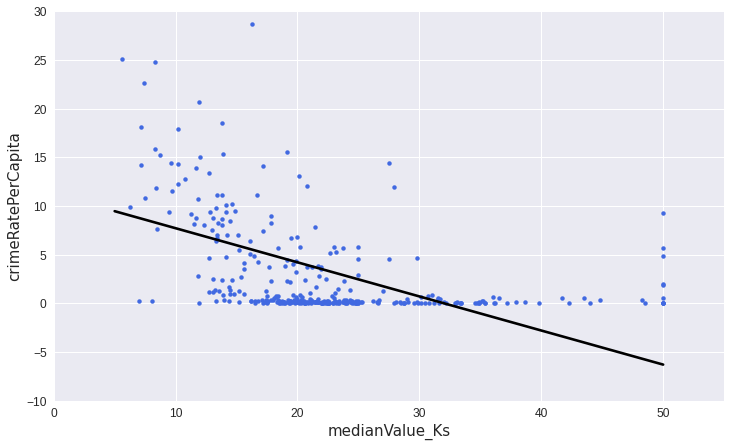

In [0]:
#usando Scatter graphs
"""
Use the subplots function in matplotlib to define a canvas (assigned the variable name fig in the following code) and a graph object (assigned the variable 
name ax in the following code) in Python. 
You can set the size of the graph by setting the figsize (width = 10, height = 6) argument of the function

Use the seaborn function regplot to create the scatter plot

The function accepts arguments for the independent variable (x), the dependent variable (y), the confidence interval of the regression parameters (ci), 
which takes values from 0 to 100, the DataFrame that has x and y (data), a matplotlib graph object (ax), and others to control the aesthetics of the 
points on the graph.  (In this case, the confidence interval is set to None
"""
fig, ax = plt.subplots(figsize=(10, 6))
fig.tight_layout()
ax.set_ylabel('Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=55)
ax.set_ylim(bottom=-10, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)

sns.regplot(x='medianValue_Ks', y='crimeRatePerCapita', ci=None, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})


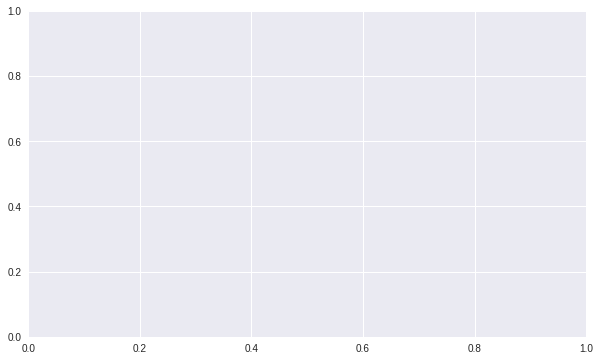

In [0]:
fig, ax = plt.subplots(figsize=(10, 6))